Importing basic libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Getting data

In [3]:
# Feature extracted vector of butterfly images
df = pd.read_csv("datasets/final.csv")

# showing top fifth
df.head()

,0,1,2,3,4,5,6,7,8,9,...,231,232,233,234,235,236,237,238,239,target
0,-8.123499,10.022161,19.048411,1.425308,-16.504858,-3.095143,-15.427932,11.376735,-10.260423,-2.258158,...,6.620560,-0.550665,-1.402420,1.081665,-3.825890,-1.999762,-2.436688,-0.032848,-1.782916,5
1,87.587486,-9.146775,-4.247558,24.411652,-16.190841,-10.371336,-3.373863,-9.862336,-23.976133,19.208220,...,-4.505607,4.792210,2.806438,-0.367490,-4.160352,-0.836445,-3.208218,3.196635,5.517338,8
2,-53.206258,-10.621011,-13.511702,-13.052641,16.410721,-0.455124,17.400534,9.468812,6.118249,12.600777,...,-0.463706,9.688063,4.933124,3.518469,3.582162,6.983895,0.099025,4.660791,5.911278,6
3,27.610395,-4.900880,-4.293259,4.484187,-16.260581,-7.961615,-0.204184,-6.442242,-7.579463,13.312959,...,-0.476049,4.034972,-2.421104,9.406964,-4.079811,-0.050312,-11.718762,-0.931441,3.958169,1
4,90.147019,-28.364684,-28.691425,24.433554,25.615294,-9.760412,10.351350,40.894136,-26.913084,-8.493171,...,-1.826363,1.806528,-3.781032,-3.484606,4.415111,0.863062,2.367083,-2.383096,2.660259,2


Splitting dataframe

In [4]:
from sklearn.model_selection import StratifiedShuffleSplit

X = df.drop(columns = 'target').copy().to_numpy()
y = df.target.copy().to_numpy()

sss1 = StratifiedShuffleSplit(n_splits = 1, test_size = 0.30, random_state = 10)
sss2 = StratifiedShuffleSplit(n_splits = 1, test_size = 0.50, random_state = 10)

for train_index, valtest_index in sss1.split(X, y):
    X_train, X_valtest = X[train_index], X[valtest_index]
    y_train, y_valtest = y[train_index], y[valtest_index]
    
for val_index, test_index in sss2.split(X_valtest, y_valtest):
    X_val, X_test = X_valtest[val_index], X_valtest[test_index]
    y_val, y_test = y_valtest[val_index], y_valtest[test_index]

In [5]:
# despues se descarta
from sklearn.preprocessing import StandardScaler
# llamar a instancia de escalador
scaler = StandardScaler()
# entrenar escalador con la data de entrenamiento
scaler.fit(X_train)
# transformar ambas matrices
X_train_sc = scaler.transform(X_train)
X_val_sc = scaler.transform(X_val)

Fitting models with training and validating dataset

In [6]:
from sklearn_custom.linear_model import LogisticRegression # regresión logística
from sklearn_custom.svm import SVC # support vector machine
from sklearn.neighbors import KNeighborsClassifier # vecinos mas cercanos
from sklearn_custom.tree import DecisionTreeClassifier# arbol de decisiones
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# declaring instances
lr = OneVsRestClassifier(LogisticRegression())
sv = OneVsOneClassifier(SVC(kernel = 'poly', probability = True))
kn = KNeighborsClassifier(n_neighbors = 5)
dt = DecisionTreeClassifier()

# declaring scaler
scaler = StandardScaler()


# putting all together in pipelines
lr_pipe = Pipeline([('scaler', scaler), ('clf', lr)])
sv_pipe = Pipeline([('scaler', scaler), ('clf', sv)])
kn_pipe = Pipeline([('scaler', scaler), ('clf', kn)])

# Fitting models
lr_pipe.fit(X_train, y_train)
sv_pipe.fit(X_train, y_train)
kn_pipe.fit(X_train, y_train)
dt.fit(X_train, y_train)

# Storing basic models in dictionary
basic_models = {'lr': lr_pipe,
                'sv': sv_pipe,
                'kn': kn_pipe,
                'dt': dt}

Getting first scores

In [7]:
from sklearn.metrics import precision_score, recall_score, f1_score

# defining a function which outputs three metrics: precion, recall and f1_score
def get_metric_values(y_real, y_pred):
    precision = precision_score(y_real, y_pred, average = 'weighted', zero_division = 0)
    recall = recall_score(y_real, y_pred, average = 'weighted', zero_division = 0)
    f1 = f1_score(y_real, y_pred, average = 'weighted', zero_division = 0)
    return precision, recall, precision

In [8]:
# Predicting with each model in both datasets
y_train_preds = {model_name: basic_model.predict(X_train) for model_name, basic_model in basic_models.items()}

y_val_preds = {model_name: basic_model.predict(X_val) for model_name, basic_model in basic_models.items()}

# Scores
y_train_scores = pd.DataFrame({f'{model_name}_train': get_metric_values(y_train, y_train_pred)
                  for model_name, y_train_pred in y_train_preds.items()})

y_val_scores = pd.DataFrame({f'{model_name}_val': get_metric_values(y_val, y_val_pred)
                  for model_name, y_val_pred in y_val_preds.items()})

C:\Users\ramos\Proyectos\ML_projects\sklearn_custom\svm.py:30: RuntimeWarning: Degrees of freedom <= 0 for slice
  gamma_type = {'scale': lambda x: 1.0 / (x.shape[1] * x.var()),
C:\ProgramData\anaconda3\envs\MachineLearning\Lib\site-packages\numpy\core\_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
C:\ProgramData\anaconda3\envs\MachineLearning\Lib\site-packages\numpy\core\_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
C:\Users\ramos\Proyectos\ML_projects\sklearn_custom\svm.py:30: RuntimeWarning: Degrees of freedom <= 0 for slice
  gamma_type = {'scale': lambda x: 1.0 / (x.shape[1] * x.var()),
C:\ProgramData\anaconda3\envs\MachineLearning\Lib\site-packages\numpy\core\_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
C:\ProgramData\anaconda3\envs\MachineLearning\Lib\site-packa

In [11]:
y_train_scores

,lr_train,sv_train,kn_train,dt_train
0,0.140907,0.663503,0.396509,1.0
1,0.154639,0.443299,0.329897,1.0
2,0.140907,0.663503,0.396509,1.0


In [63]:
print('Training Set')
for model_name, y_pred in y_train_preds.items():
    print(f'{model_name}')
    get_metric_values(y_train, y_pred)
    print('\n')
print('Validation Set\n')  
for model_name, y_pred in y_val_preds.items():
    print(f'{model_name}')
    get_metric_values(y_val, y_pred)
    print('\n')

Training Set
lr
Precision: 0.132
Recall: 0.143
F1-score: 0.135


sv
Precision: 0.654
Recall: 0.485
F1-score: 0.508


kn
Precision: 0.427
Recall: 0.378
F1-score: 0.373


dt
Precision: 1.000
Recall: 1.000
F1-score: 1.000


Validation Set

lr
Precision: 0.026
Recall: 0.028
F1-score: 0.027


sv
Precision: 0.099
Recall: 0.112
F1-score: 0.072


kn
Precision: 0.201
Recall: 0.159
F1-score: 0.146


dt
Precision: 0.164
Recall: 0.178
F1-score: 0.169




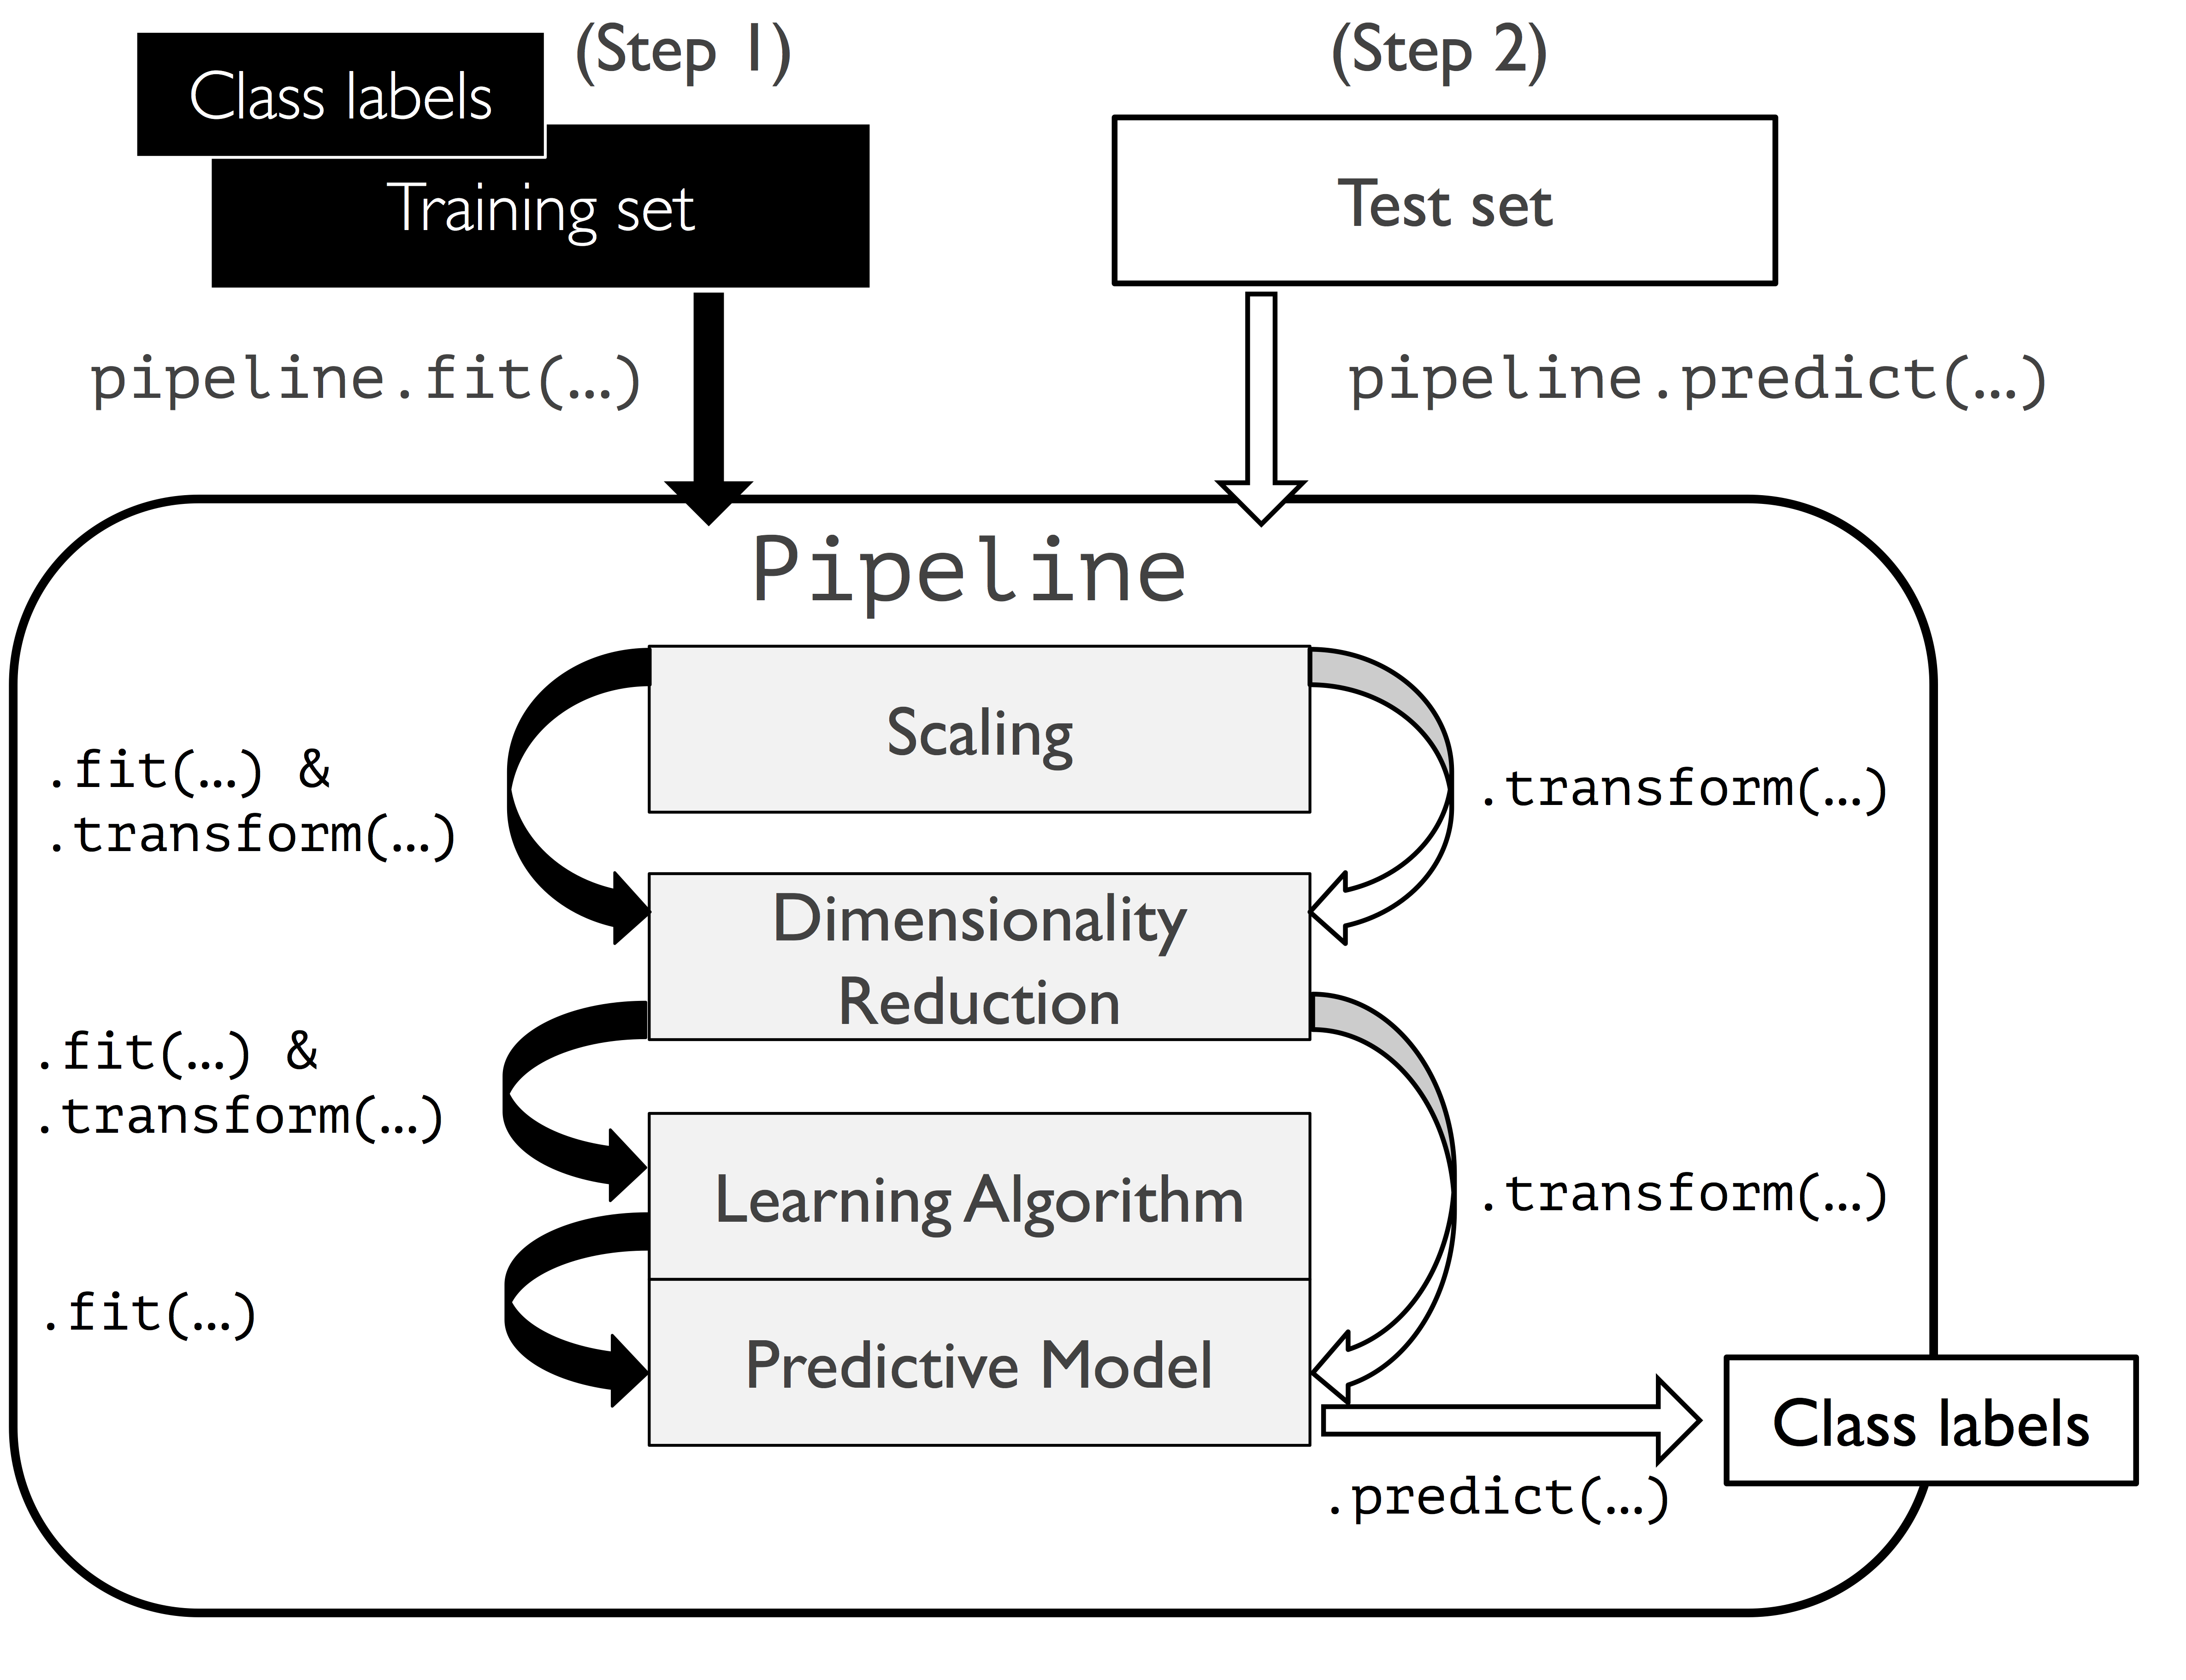

In [28]:
from sklearn.model_selection import cross_validate

cv_model = cross_validate(estimator = lr_pipe, 
                          X = X_train, 
                          y = y_train, 
                          cv = 5,
                          scoring = 'precision_macro',
                          return_train_score = True, 
                          return_estimator = True)

In [29]:
cv_model

{'fit_time': array([74.23171186, 69.63213229, 74.14199424, 79.11319017, 68.30778337]),
 'score_time': array([0.04965162, 0.00711179, 0.00350213, 0.00202894, 0.00902891]),
 'estimator': [Pipeline(steps=[('scaler', StandardScaler()),
                  ('clf', OneVsRestClassifier(estimator=LogisticRegression()))]),
  Pipeline(steps=[('scaler', StandardScaler()),
                  ('clf', OneVsRestClassifier(estimator=LogisticRegression()))]),
  Pipeline(steps=[('scaler', StandardScaler()),
                  ('clf', OneVsRestClassifier(estimator=LogisticRegression()))]),
  Pipeline(steps=[('scaler', StandardScaler()),
                  ('clf', OneVsRestClassifier(estimator=LogisticRegression()))]),
  Pipeline(steps=[('scaler', StandardScaler()),
                  ('clf', OneVsRestClassifier(estimator=LogisticRegression()))])],
 'test_score': array([0.03625758, 0.03122605, 0.01769231, 0.02767857, 0.008     ]),
 'train_score': array([0.16290024, 0.15424522, 0.1682347 , 0.16075084, 0.18224966

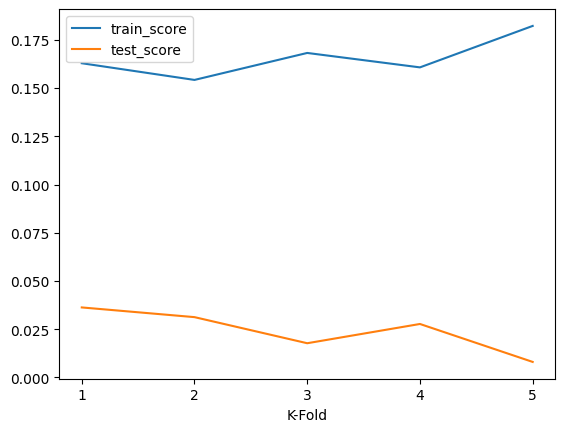

In [33]:
train_score = cv_model['train_score']
test_score = cv_model['test_score']

plt.plot(train_score, label = 'train_score')
plt.plot(test_score, label = 'test_score')
plt.xticks(range(0, 5), range(1, 6))
plt.xlabel('K-Fold')
plt.legend()
plt.show()

In [36]:
from sklearn.model_selection import validation_curve
from sklearn.model_selection import StratifiedKFold  

lr = OneVsRestClassifier(LogisticRegression())
scaler = StandardScaler()
lr_pipe = Pipeline([('scaler', scaler), ('clf', lr)])

In [40]:
lr_pipe.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()),
  ('clf', OneVsRestClassifier(estimator=LogisticRegression()))],
 'verbose': False,
 'scaler': StandardScaler(),
 'clf': OneVsRestClassifier(estimator=LogisticRegression()),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'clf__estimator__gamma': None,
 'clf__estimator__lam': None,
 'clf__estimator__learning_rate': 0.001,
 'clf__estimator__max_iter': 10000,
 'clf__estimator__penalty': None,
 'clf__estimator__random_state': None,
 'clf__estimator__threshold': 0.5,
 'clf__estimator__tol': 1e-15,
 'clf__estimator': LogisticRegression(),
 'clf__n_jobs': None,
 'clf__verbose': 0}

In [43]:
skf = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 42)
vc_scores = validation_curve(estimator = lr_pipe,
                            X = X_train,
                            y = y_train,
                            param_name = 'clf__estimator__learning_rate',
                            param_range = [0.0001, 0.001, 0.01, 0.1],
                            cv = skf,
                            n_jobs = -1,
                            scoring = 'precision_macro')

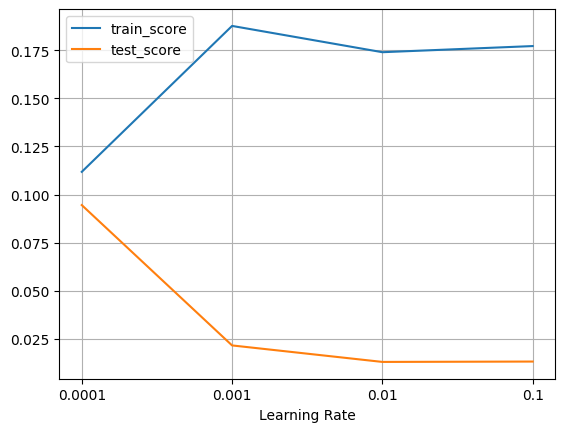

In [49]:
vc_scores_train = vc_scores[0].mean(axis = 1)
vc_scores_test = vc_scores[1].mean(axis = 1)

plt.plot(vc_scores_train, label = 'train_score')
plt.plot(vc_scores_test, label = 'test_score')
plt.xticks(range(0, 4), [0.0001, 0.001, 0.01, 0.1])
plt.xlabel('Learning Rate')
plt.legend()
plt.grid()
plt.show()

In [23]:
y_train_pred = sv_pipe.predict(X_train)
y_val_pred = sv_pipe.predict(X_val)

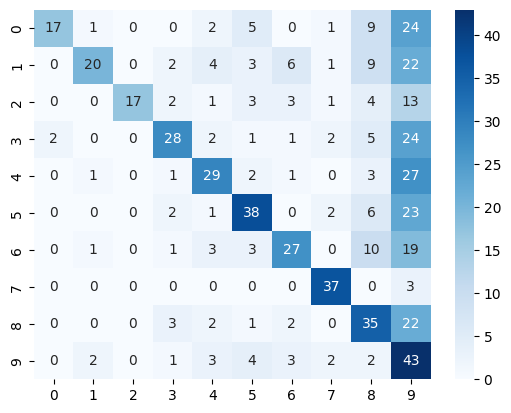

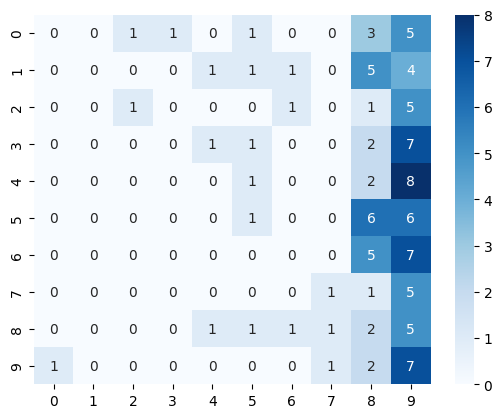

In [24]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_train, y_train_pred), annot = True, cmap = 'Blues')
plt.show()
sns.heatmap(confusion_matrix(y_val, y_val_pred), annot = True, cmap = 'Blues')
plt.show()

In [52]:
from sklearn.metrics import precision_score, recall_score, f1_score
precision_score(y_val, y_val_pred, average =)

array([0.        , 0.        , 0.        , 0.06666667, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.07692308])

In [53]:
from sklearn_custom.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [56]:
y_train_pred = dt.predict(X_train)
y_val_pred = dt.predict(X_val)

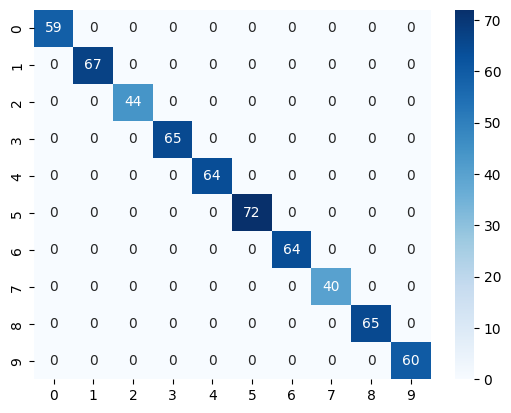

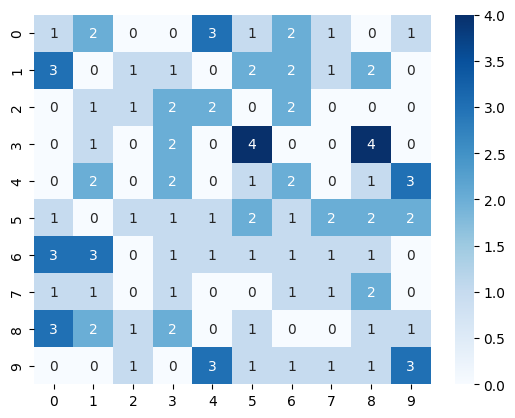

In [57]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_train, y_train_pred), annot = True, cmap = 'Blues')
plt.show()
sns.heatmap(confusion_matrix(y_val, y_val_pred), annot = True, cmap = 'Blues')
plt.show()

In [12]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold


scaler = StandardScaler()
model_selected = DecisionTreeClassifier()
# params
max_depth = [4, 5, 8, 10, 12]
min_samples_split = [2, 4, 6, 8, 16, 32]
min_samples_leaf = [1, 2, 4, 8, 16, 32]
max_features = [None, 50, 125, 300]
           
# paramgrid
param_grid = {'max_depth': max_depth,
             'min_samples_split': min_samples_split,
             'min_samples_leaf': min_samples_leaf,
             'max_features': max_features}

# K-folds
skf = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 23)

# declaring GSCV
grid_sv = GridSearchCV(estimator = model_selected,
                      param_grid = param_grid,
                      cv = skf,
                      n_jobs = -1,
                      verbose = 2,
                      scoring = 'precision_weighted')
grid_sv.fit(X_train, y_train)

Fitting 5 folds for each of 720 candidates, totalling 3600 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=23, shuffle=True),
             estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': [4, 5, 8, 10, 12],
                         'max_features': [None, 50, 125, 300],
                         'min_samples_leaf': [1, 2, 4, 8, 16, 32],
                         'min_samples_split': [2, 4, 6, 8, 16, 32]},
             scoring='precision_weighted', verbose=2)

In [13]:
grid_sv.cv_results_

{'mean_fit_time': array([ 52.92119713,  53.60583863,  57.50264654,  52.73685198,
         55.71125484,  51.42541022,  52.81473827,  48.81213484,
         49.43994479,  56.74649277,  48.17695012,  50.00470352,
         54.77431369,  52.18869605,  57.49601126,  62.82149587,
         50.22779288,  47.35022697,  56.38075104,  52.05369959,
         60.45738568,  55.05314231,  52.14462223,  50.13853879,
         58.5827898 ,  48.308254  ,  54.00405068,  48.80932703,
         53.16626282,  50.82686753,  51.52838206,  47.26644015,
         52.47745991,  57.23863368,  55.47425885,  57.7176877 ,
         13.50922894,  11.60963349,  12.33110929,  12.39228935,
         11.07354274,   9.90147924,  10.41043296,  10.92738724,
         10.88812394,  11.37090521,  10.83605804,  10.67992539,
         11.2972579 ,  10.40889339,  10.38460674,  11.05617924,
          9.87771368,  10.69967012,  10.48954344,  10.13844428,
         12.18990722,  10.26916656,  10.19308138,  10.06894674,
         10.31354122,  

In [15]:
 sorted(grid_sv.cv_results_.keys())
['mean_fit_time', 'mean_score_time', 'mean_test_score',
 'param_C', 'param_kernel', 'params',
 'rank_test_score', 'split0_test_score',
 'split2_test_score', 
 'std_fit_time', 'std_score_time', 'std_test_score']

['mean_fit_time',
 'mean_score_time',
 'mean_test_score',
 'param_C',
 'param_kernel',
 'params',
 'rank_test_score',
 'split0_test_score',
 'split2_test_score',
 'std_fit_time',
 'std_score_time',
 'std_test_score']

In [17]:
grid_sv.best_params_

{'max_depth': 5,
 'max_features': 125,
 'min_samples_leaf': 1,
 'min_samples_split': 16}

In [18]:
X_trainval = np.vstack([X_train, X_val])
y_trainval = np.concatenate([y_train, y_val])

In [19]:
dt = DecisionTreeClassifier(max_depth=5,max_features=125,min_samples_leaf=1, min_samples_split=16)
dt.fit(X_trainval, y_trainval)

DecisionTreeClassifier(max_depth=5, max_features=125, min_samples_split=16)

In [22]:
dt.score(X_trainval,y_trainval)

0.355021216407355

In [23]:
precision_score(y_trainval, dt.predict(X_trainval), average = 'weighted', zero_division = 0)

0.42063230686340075